In [34]:
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

circles_folder = "shapes/circles"
squares_folder = "shapes/squares"
triangles_folder = "shapes/triangles"

images = []
labels = []

for folder, label in [(circles_folder, 0), (squares_folder, 1), (triangles_folder, 2)]:
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

images.shape


(300, 28, 28)

In [35]:
# 데이터 전처리

# train, test 분리
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# 픽셀 값을 0~1 범위로 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images.shape

(240, 28, 28)

In [41]:
# CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3749 - loss: 1.1202 - val_accuracy: 0.3750 - val_loss: 1.0886
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3023 - loss: 1.1054 - val_accuracy: 0.4167 - val_loss: 1.0894
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5068 - loss: 1.0882 - val_accuracy: 0.4792 - val_loss: 1.0967
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5359 - loss: 1.0828 - val_accuracy: 0.4583 - val_loss: 1.0894
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5030 - loss: 1.0706 - val_accuracy: 0.3333 - val_loss: 1.0853
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5202 - loss: 1.0578 - val_accuracy: 0.5000 - val_loss: 1.0683
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6420 - loss: 1.0223 - val_accuracy: 0.3750 - val_loss: 1.0637
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6522 - loss: 0.9922 - val_accuracy: 0.4792 - val_loss: 1.0413


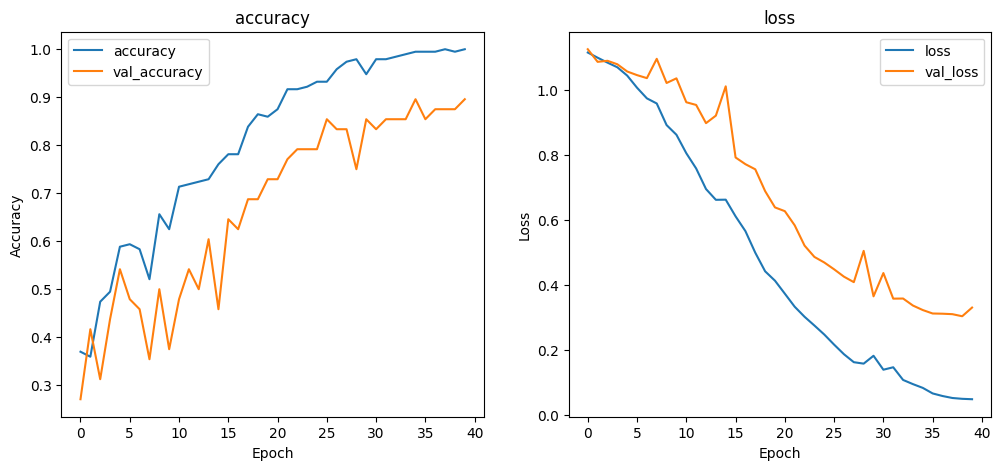

In [40]:
def plot_history (history):
  plt.figure(figsize=(12, 5))

  # 정확도 시각화
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # 손실 시각화
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_history(history)